In [19]:
# Linear regression
import numpy as np

def loss(x, y, theta):
    m = float(len(x))
    return np.sum((y_hat(x, theta) - y)**2)

def y_hat(x, theta):
    return theta[0] + x*theta[1]

def normalize(a):
    return (a-min(a))/float(max(a)-min(a))

# Returns parameters for regression line
def gradient_descent(x, y, mode='batch', alpha=1e-2, eps=1e-3):
    theta = np.random.randn(2)
    x_norm = normalize(x)
    y_norm = normalize(y)
    if mode == 'batch':
        while loss(x_norm, y_norm, theta) > eps:
            diff = y_hat(x_norm, theta) - y_norm
            theta[0] = theta[0] - alpha*np.sum(diff)
            theta[1] = theta[1] - alpha*np.sum(diff*x_norm)
    if mode == 'stochastic':
        m = len(x)
        while loss(x_norm, y_norm, theta) > eps:
            diff = y_hat(x_norm, theta) - y_norm
            idx = np.random.randint(m)
            theta[0] = theta[0] - alpha*diff[idx]
            theta[1] = theta[1] - alpha*diff[idx]*x_norm[idx]
    print('Regression Line ({}): y = {} + {}x'.format(mode, theta[0], theta[1]))
    return theta

print('Performing linear regression on french dataset:')
# http://fileadmin.cs.lth.se/cs/Education/EDA132/Labs/ML/salammbo_a_fr.plot
x1 = np.array([36961, 43621, 15694, 36231, 29945, 40588, 75255, 37709, 30899, 25486, 37497, 40398, 74105, 76725, 18317])
y1 = np.array([2503, 2992, 1042, 2487, 2014, 2805, 5062, 2643, 2126, 1784, 2641, 2766, 5047, 5312, 1215])
gradient_descent(x1, y1, mode='stochastic', eps=0.0016)
gradient_descent(x1, y1, mode='batch', eps=0.0016)

print('\nPerforming linear regression on english dataset:')
# http://fileadmin.cs.lth.se/cs/Education/EDA132/Labs/ML/salammbo_a_en.plot
x2 = np.array([35680, 42514, 15162, 35298, 29800, 40255, 74532, 37464, 31030, 24843, 36172, 39552, 72545, 75352, 18031])
y2 = np.array([2217, 2761, 990, 2274, 1865, 2606, 4805, 2396, 1993, 1627, 2375, 2560, 4597, 4871, 1119])
gradient_descent(x2, y2, mode='stochastic', eps=0.0014)
gradient_descent(x2, y2, mode='batch', eps=0.0014)

Performing linear regression on french dataset:
Regression Line (stochastic): y = 0.011688739748 + 0.97096596262x
Regression Line (batch): y = 0.011530327011 + 0.970788604168x

Performing linear regression on english dataset:
Regression Line (stochastic): y = -0.00229204478258 + 0.991960085909x
Regression Line (batch): y = -0.0023805722275 + 0.991935936318x


array([-0.00238057,  0.99193594])

Regression Line (batch): y = 0.0011289402164 + 0.984267009991x


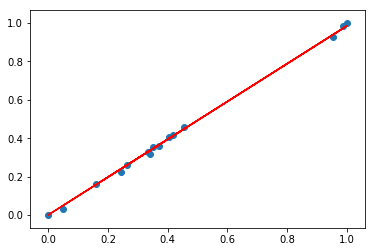

In [37]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = x2
y = y2

fig, ax = plt.subplots()
theta = gradient_descent(x, y, mode='batch', eps=0.0016)
x_norm = normalize(x)
y_norm = normalize(y)
ax.plot(x_norm, theta[0] + theta[1]*x_norm, color='red')
ax.scatter(x_norm, y_norm)